/home/carreira/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")
/home/carreira/anaconda2/lib/python2.7/site-packages/fatiando/vis/myv.py:51: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")


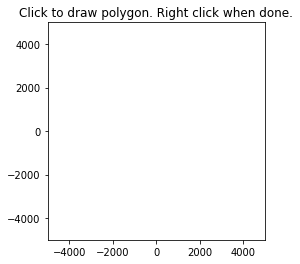

ValueError: Need at least 3 points to make a polygon

In [1]:
"""
GravMag: 3D forward modeling of total-field magnetic anomaly using polygonal
prisms
"""
from fatiando import mesher, gridder, utils
from fatiando.vis import mpl, myv
from fatiando.gravmag import polyprism

# The regional field
inc, dec = 30, -15
# Draw each polygonal prism (viewed from above)
bounds = [-5000, 5000, -5000, 5000, 0, 5000]
area = bounds[:4]
axis = mpl.figure().gca()
mpl.axis('scaled')
model = [
    mesher.PolygonalPrism(
        mpl.draw_polygon(area, axis, xy2ne=True),
        # Use only induced magnetization
        0, 2000, {'magnetization': 2})]
# Calculate the effect
shape = (100, 100)
xp, yp, zp = gridder.regular(area, shape, z=-500)
tf = polyprism.tf(xp, yp, zp, model, inc, dec)
# and plot it
mpl.figure()
mpl.axis('scaled')
mpl.title("Total field anomalyproduced by prism model (nT)")
mpl.contourf(yp, xp, tf, shape, 20)
mpl.colorbar()
for p in model:
    mpl.polygon(p, '.-k', xy2ne=True)
mpl.set_area(area)
mpl.m2km()
mpl.show()
# Show the prisms
myv.figure()
myv.polyprisms(model, 'magnetization')
myv.axes(myv.outline(bounds), ranges=[i * 0.001 for i in bounds])
myv.wall_north(bounds)
myv.wall_bottom(bounds)
myv.show()